<a href="https://colab.research.google.com/github/Gur-jot/CodeClauseInternship_Gender_and_Age_Detection/blob/main/Task_Gender_and_Age_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Modules

In [ ]:
import numpy as np #Numerical Python -> Mathematical Operation
import pandas as pd #Data Manipulation
import os #File Processing
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
import warnings
from tqdm.notebook import tqdm # for getting loading screen or the progress bar
warnings.filterwarnings('ignore') #For clean results
%matplotlib inline

#Dataset
https://www.kaggle.com/datasets/jangedoo/utkface-new

#About Dataset
UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.



In [ ]:
pip install opendatasets #For getting dataset

In [ ]:
import opendatasets as od

#Downloading DataSet
od.download("https://www.kaggle.com/datasets/jangedoo/utkface-new")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gurj0t
Your Kaggle Key: ··········


100%|██████████| 331M/331M [00:15<00:00, 22.2MB/s]


#Load the Dataset

In [ ]:
BASE_DIR='/content/utkface-new/UTKFace' #To load Data

In [ ]:
#Labels - Age , Gender , Ethnicity

image_paths=[]
age_labels=[]
gender_labels=[]

for filename in tqdm(os.listdir(BASE_DIR)): #iterate all the filees in directory
  image_path=os.path.join(BASE_DIR,filename) #combining BASE_DIR and filename
  temp=filename.split('_') #Splitting filename into multiple paths
  age=int(temp[0])
  gender=int(temp[1])
  image_paths.append(image_path) #Adding image_path in image_paths list
  age_labels.append(age) #adding age in age_labels list
  gender_labels.append(gender) #adding gender in gender_labels list

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
#Convert to DataFrame
df=pd.DataFrame()
#Three Columns that we need
df['image'],df['age'],df['gender']=image_paths,age_labels,gender_labels

In [ ]:
df.head() #Viewing the first 5 datapoints

image  age  gender
0  /content/utkface-new/UTKFace/54_0_3_2017011920...   54       0
1  /content/utkface-new/UTKFace/90_1_0_2017012022...   90       1
2  /content/utkface-new/UTKFace/3_1_2_20161219204...    3       1
3  /content/utkface-new/UTKFace/44_0_0_2017011700...   44       0
4  /content/utkface-new/UTKFace/1_0_2_20161219193...    1       0

In [ ]:
#Map Labels for Gender
gender_dict={0:'Male',1:'Female'}

#Exploratory Data Analysis

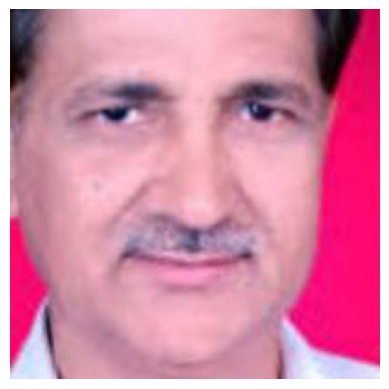

In [ ]:
from PIL import Image #To display Image
img=Image.open(df['image'][0]) #1st image
plt.axis('off') #Remove axis
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

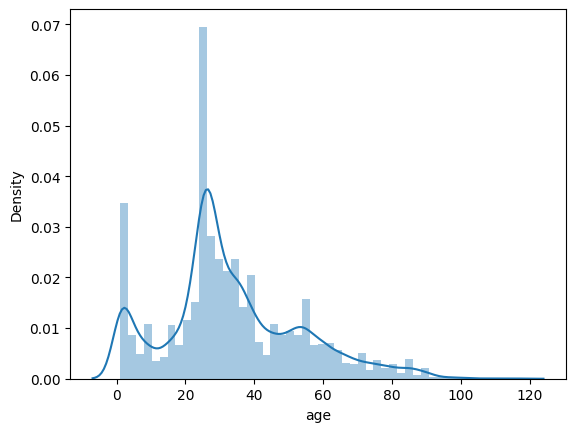

In [ ]:
sns.distplot(df['age']) #Age Distribution

In [ ]:
df['gender'].value_counts() #Count of each Category

0    12391
1    11317
Name: gender, dtype: int64

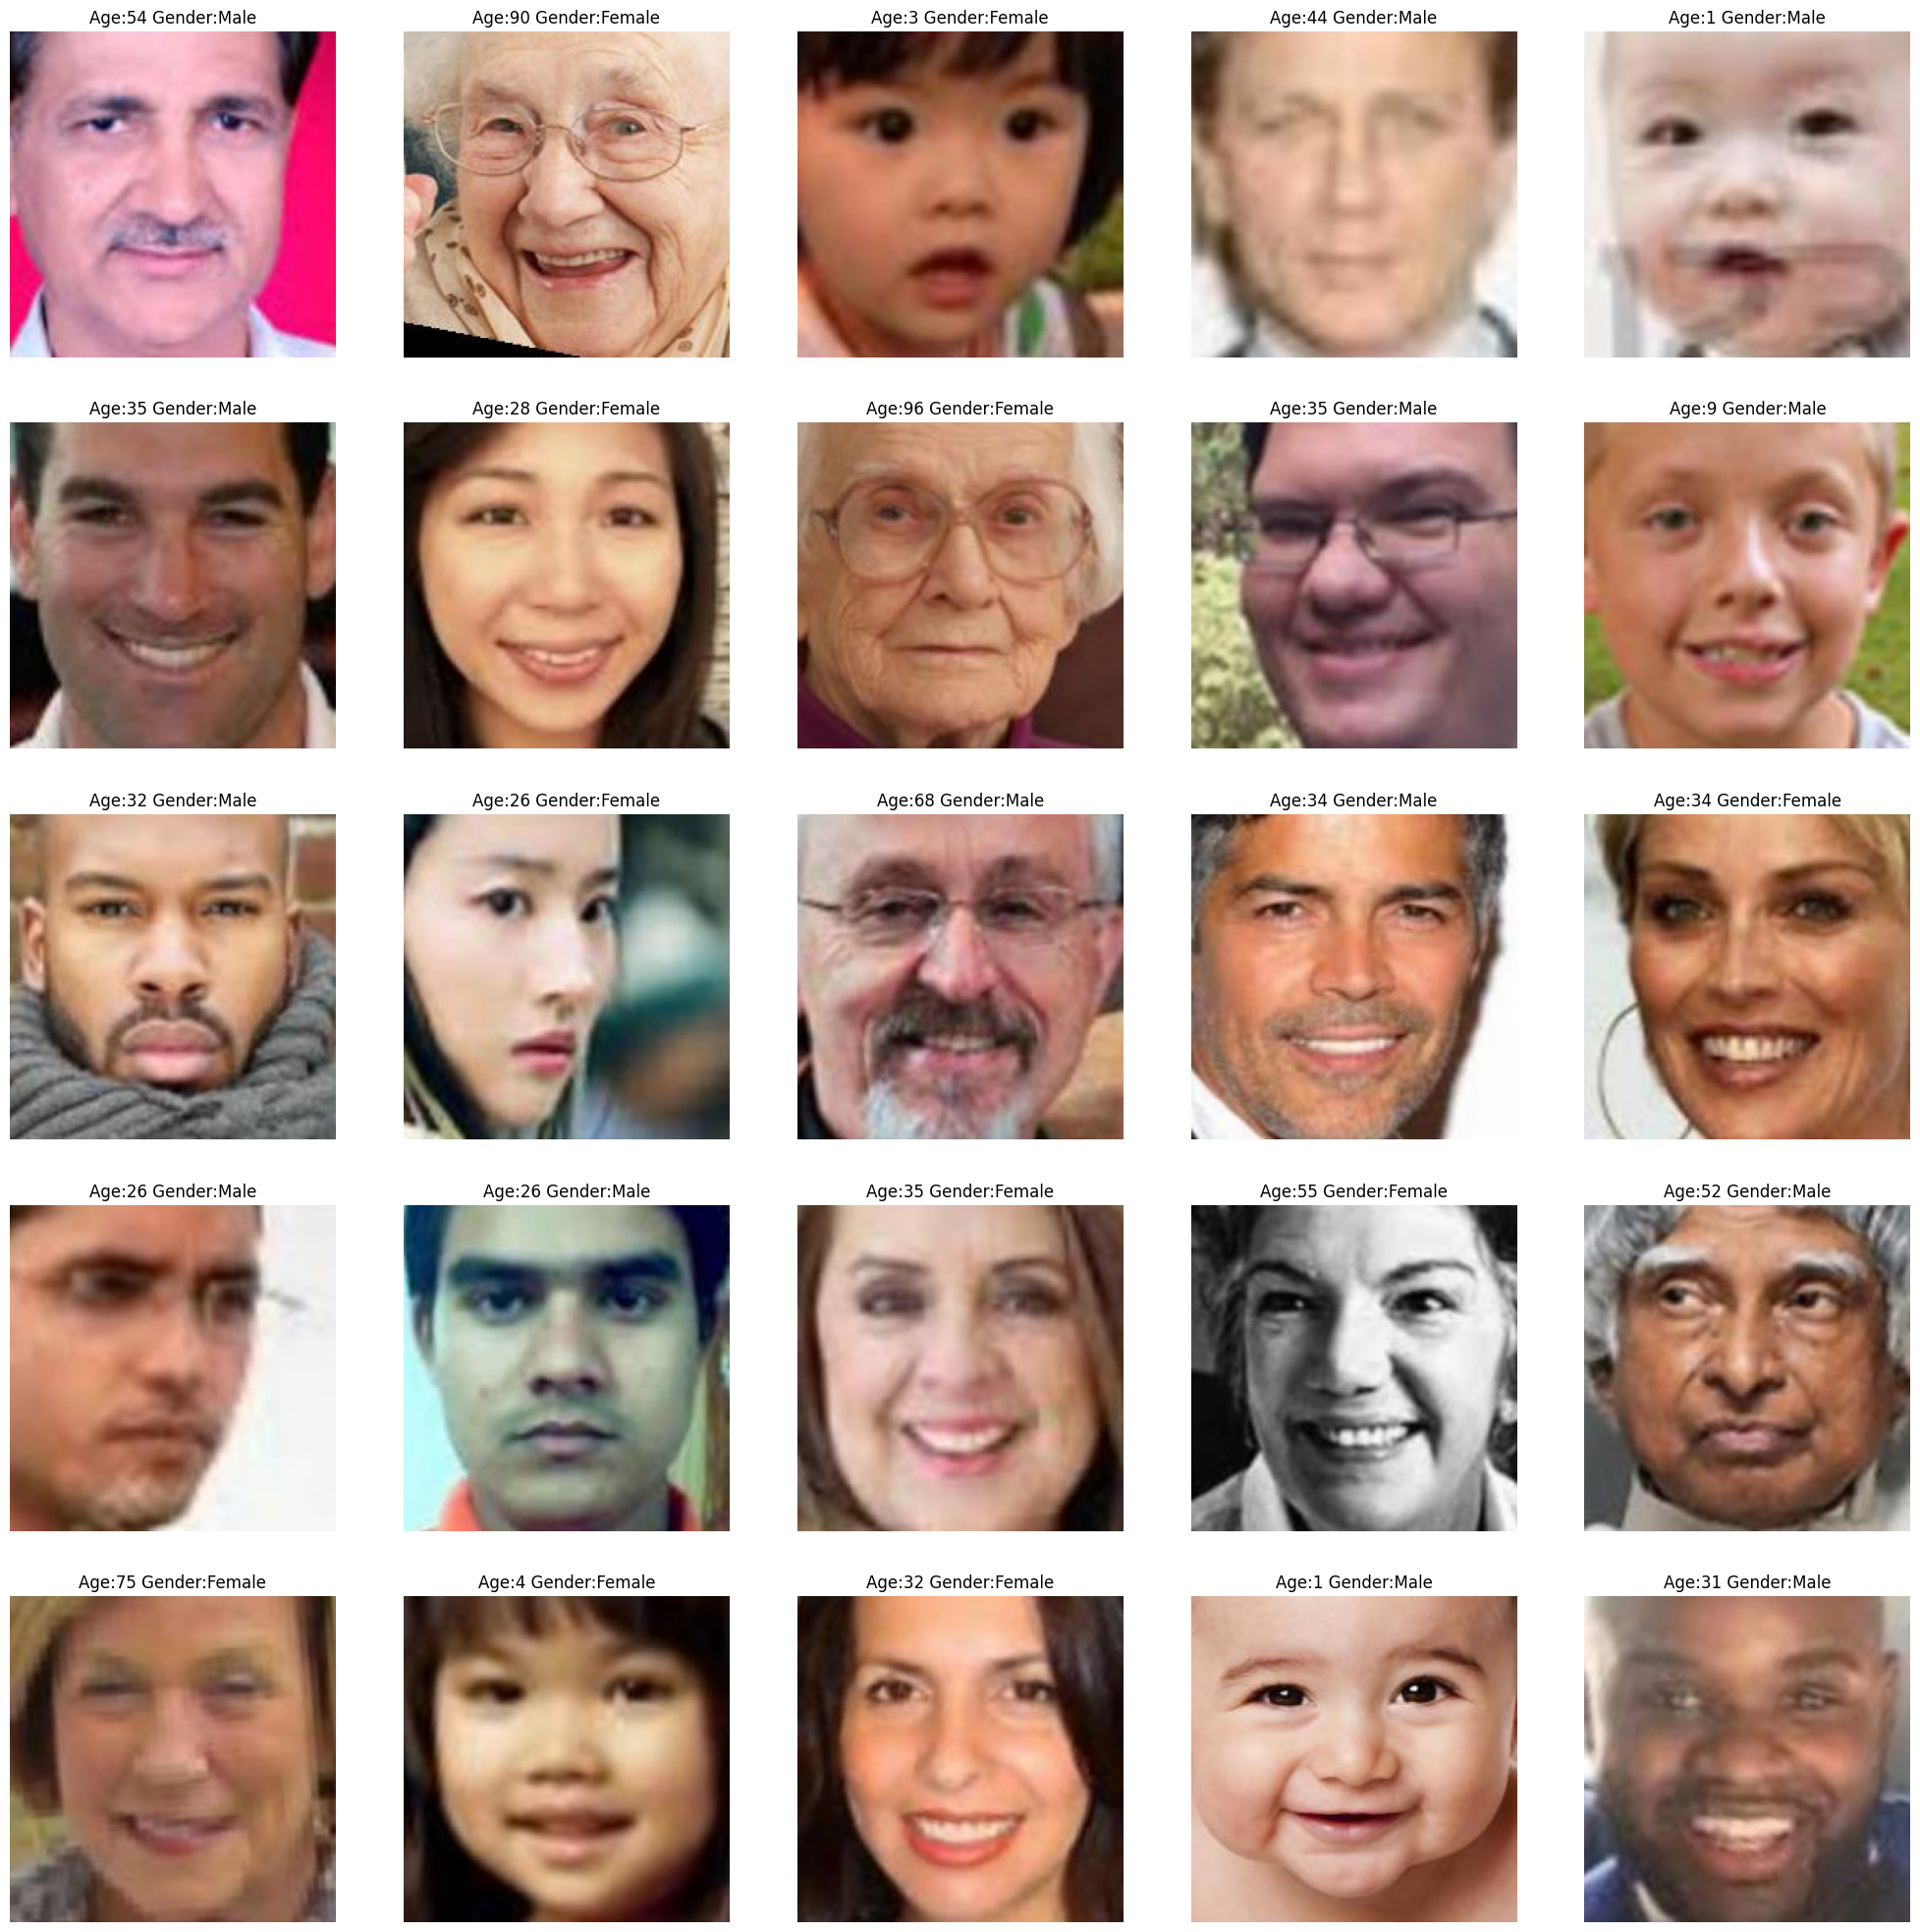

In [ ]:
#To display grid of images
plt.figure(figsize=(25,25))
files=df.iloc[0:25]

for index,file,age,gender in files.itertuples(): #Enumeration for plotting
  plt.subplot(5,5,index+1) #5 rows, 5 columns, index=1
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title(f'Age:{age} Gender:{gender_dict[gender]}')
  plt.axis('off') 3ignore numbers for axis

#Feature Extraction

In [ ]:
def extract_features(images):
  features=[] #Feature list
  for image in tqdm(images):
    img=load_img(image,grayscale=True) #Converting to grayscale because of memory usage
    img=img.resize((128,128),Image.ANTIALIAS) #Reshaping, To avoid distortion we are using ANTIALIAS
    img=np.array(img)
    features.append(img)

  features=np.array(features) #Converting features to numpy arrays
  #Ignore this step if using RGB
  features=features.reshape(len(features),128,128,1) #Reshaping
  return features

In [ ]:
X=extract_features(df['image']) #Extraxting Features

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape #Shape of data

(23708, 128, 128, 1)

In [ ]:
#Normalize the images
X=X/255.0 #To get pixel range in 0-1

In [ ]:
y_gender=np.array(df['gender']) #Converting Gander into Numpy array
y_age=np.array(df['age']) # Converting age into Numpy array

In [ ]:
input_shape=(128,128,1) #Shape of data

#Model Creation

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D,Input

In [ ]:
inputs=Input((input_shape))

#Convolutional Layers
#Layer 1
conv_1=Conv2D(32,
              kernel_size=(3,3),
              activation='relu') (inputs)
maxp_1=MaxPooling2D(pool_size=(2,2)) (conv_1)

#Layer 2
conv_2=Conv2D(64,
              kernel_size=(3,3),
              activation='relu') (maxp_1)
maxp_2=MaxPooling2D(pool_size=(2,2)) (conv_2)

#Layer 3
conv_3=Conv2D(128,
              kernel_size=(3,3),
              activation='relu') (maxp_2)
maxp_3=MaxPooling2D(pool_size=(2,2)) (conv_3)

#Layer 4
conv_4=Conv2D(256,
              kernel_size=(3,3),
              activation='relu') (maxp_3)
maxp_4=MaxPooling2D(pool_size=(2,2)) (conv_4)

flatten=Flatten()(maxp_4) #coverts into 1d vector

#fully connected layers
dense_1=Dense(256, activation='relu')(flatten)
dense_2=Dense(256, activation='relu')(flatten)

dropout_1=Dropout(0.3)(dense_1)
dropout_2=Dropout(0.3)(dense_2)

output_1=Dense(1,activation='sigmoid',name='gender_out') (dropout_1)
output_2=Dense(1,activation='relu',name='age_out') (dropout_2)

model=Model(inputs=[inputs],outputs=[output_1,output_2])

model.compile(loss=['binary_crossentropy','mae'],
              optimizer='adam',
              metrics=['accuracy']) #For Regression we use mae(Mean Absolute error) and for classification binary_entropy

In [ ]:
#Conv2D-> Convolutional Layer
#MaxPooling2D -> Pooling Layer
#Dropout-> to prevent neural nets from overfitting
#Flatten -> Flattening the matrix -> 2D->1D
#Dense-> Connected Neural Networks
#activation-> Activation Function to improve Performance

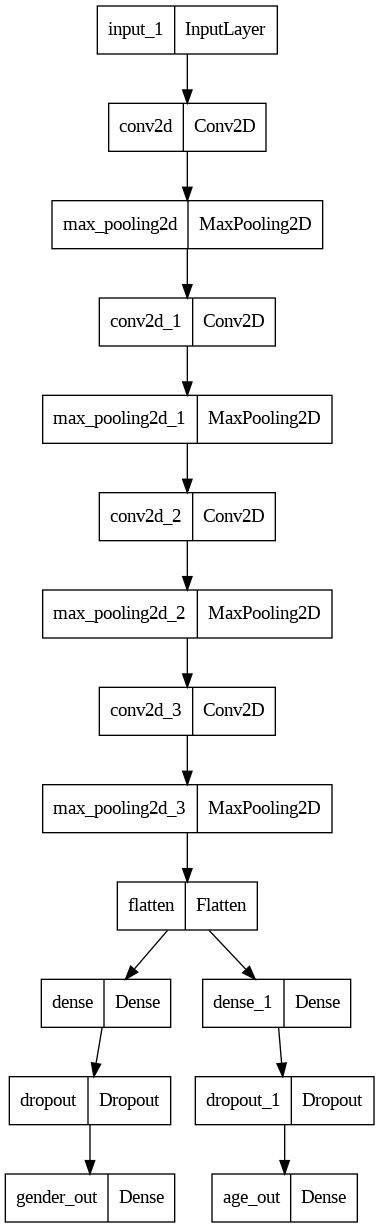

In [ ]:
#plot the model

from keras.utils import plot_model
plot_model(model)

#Train the Model

In [ ]:
history=model.fit(x=X,y=[y_gender,y_age], batch_size=32,epochs=30,validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 13s 21ms/step - loss: 5.4193 - gender_out_loss: 0.2250 - age_out_loss: 5.1944 - gender_out_accuracy: 0.8994 - age_out_accuracy: 0.0451 - val_loss: 7.1039 - val_gender_out_loss: 0.2683 - val_age_out_loss: 6.8356 - val_gender_out_accuracy: 0.8771 - val_age_out_accuracy: 0.0472
Epoch 2/30
593/593 [==============================] - 12s 20ms/step - loss: 5.2529 - gender_out_loss: 0.2158 - age_out_loss: 5.0371 - gender_out_accuracy: 0.9051 - age_out_accuracy: 0.0449 - val_loss: 6.8240 - val_gender_out_loss: 0.2815 - val_age_out_loss: 6.5425 - val_gender_out_accuracy: 0.8798 - val_age_out_accuracy: 0.0487
Epoch 3/30
593/593 [==============================] - 12s 20ms/step - loss: 5.1001 - gender_out_loss: 0.2129 - age_out_loss: 4.8872 - gender_out_accuracy: 0.9092 - age_out_accuracy: 0.0449 - val_loss: 7.1749 - val_gender_out_loss: 0.2815 - val_age_out_loss: 6.8934 - val_gender_out_accuracy: 0.8806 - val_age_out_accuracy: 0.0485
Epoch 4/30

#Plot the Results

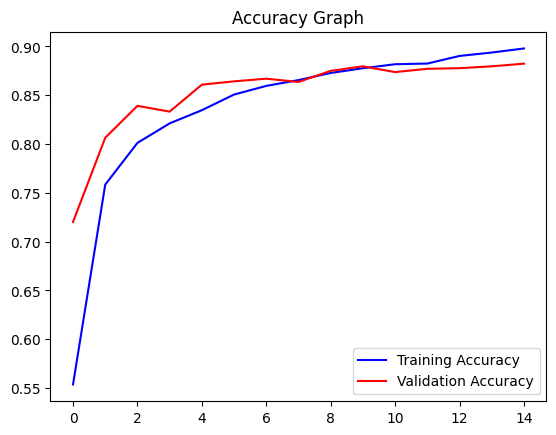

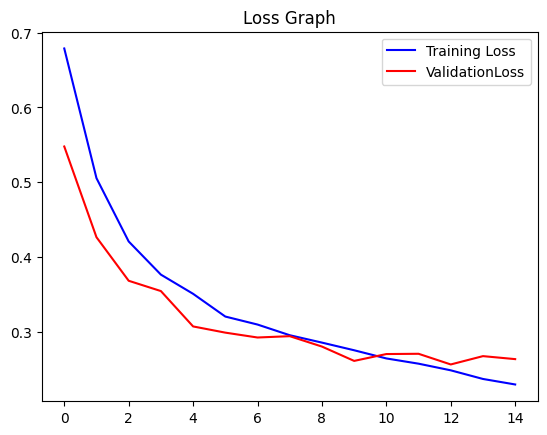

In [ ]:
#Plot Results for Gender
acc=history.history['gender_out_accuracy']
val_acc=history.history['val_gender_out_accuracy']
epochs=range(len(acc)) #Based on num of accuracy

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss=history.history['gender_out_loss']
val_loss=history.history['val_gender_out_loss']

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='ValidationLoss')
plt.title('Loss Graph')
plt.legend()
plt.show()

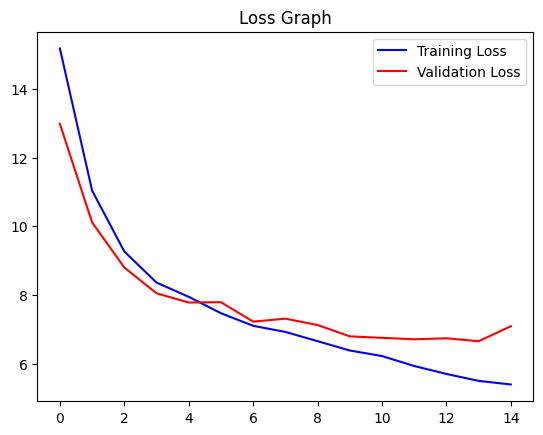

In [ ]:
#Plot Results for Age
loss=history.history['age_out_loss']
val_loss=history.history['val_age_out_loss']
epochs=range(len(loss))

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

#Prediction with Test Data

Original Gender:  Female Original Age:  38
1/1 [==============================] - 0s 22ms/step
Predicted Gender:  Female Predicted Age:  41


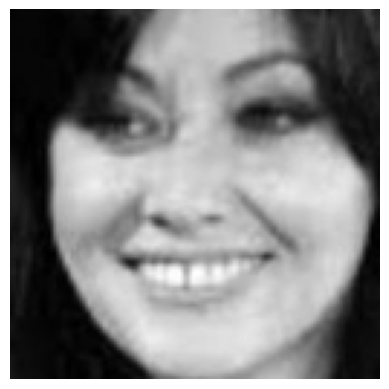

In [ ]:
image_index=2350 #Index for testing
print("Original Gender: ",gender_dict[y_gender[image_index]],"Original Age: ",y_age[image_index])

#predict from model
pred=model.predict(X[image_index].reshape(1,128,128,1))
pred_gender=gender_dict[round(pred[0][0][0])]
pred_age=round(pred[1][0][0])

print("Predicted Gender: ", pred_gender,"Predicted Age: ",pred_age)
plt.axis("off")
plt.imshow(X[image_index].reshape(128,128),cmap='gray');

Original Gender:  Male Original Age:  35
1/1 [==============================] - 0s 18ms/step
Predicted Gender:  Male Predicted Age:  31


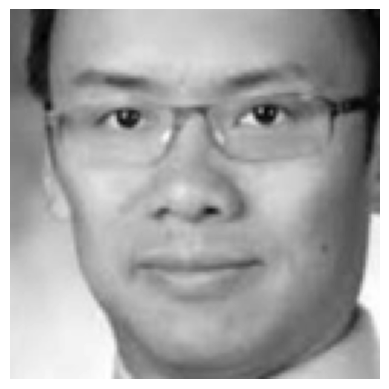

In [ ]:
image_index=3000
print("Original Gender: ",gender_dict[y_gender[image_index]],"Original Age: ",y_age[image_index])

#predict from model
pred=model.predict(X[image_index].reshape(1,128,128,1))
pred_gender=gender_dict[round(pred[0][0][0])]
pred_age=round(pred[1][0][0])

print("Predicted Gender: ", pred_gender,"Predicted Age: ",pred_age)
plt.axis("off")
plt.imshow(X[image_index].reshape(128,128),cmap='gray')

Original Gender:  Female Original Age:  21
1/1 [==============================] - 0s 19ms/step
Predicted Gender:  Female Predicted Age:  24


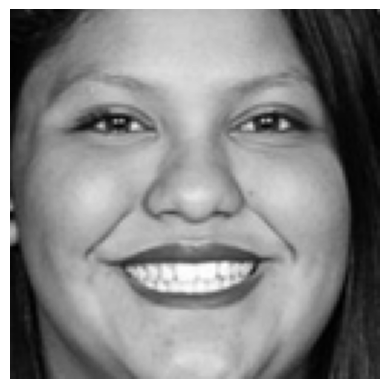

In [ ]:
image_index=1000
print("Original Gender: ",gender_dict[y_gender[image_index]],"Original Age: ",y_age[image_index])

#predict from model
pred=model.predict(X[image_index].reshape(1,128,128,1))
pred_gender=gender_dict[round(pred[0][0][0])]
pred_age=round(pred[1][0][0])

print("Predicted Gender: ", pred_gender,"Predicted Age: ",pred_age)
plt.axis("off")
plt.imshow(X[image_index].reshape(128,128),cmap='gray')

#Results
We saw above that the network is able to predict Gender to high level of accuracy and Age at medium level of Accuracy.